# Independent Project - Week 2

## 1. Defining the Question

### a) Specifying the Data Analytic Question

>Financial Inclusion remains one of the main obstacles to economic and human development in Africa. Access to bank accounts is an essential contributor to long-term economic growth. The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. 

### b) Defining the Metric for Success

The objectives to be met from the study using Exploratory Data Analysis, i.e Univariate Analysis, Bivariate Analysis and Multivariate Analysis include: 

1.   Are people in urban areas more likely to own a bank account than those in rural areas?
2.   Which gender ie males or females are more likely to own a bank account?
3.  Which age group is most likely to own a bank account?
4.  Is level of education a factor in Bank Account opening?
5.  Marital statuse has any correlation to one owning a bank account? 

### c) Understanding the context 

Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. 

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. 

Therefore, access to bank accounts is an essential contributor to long-term economic growth.



### d) Recording the Experimental Design

We'll perform Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables to come up with a prediction on individuals who are most likely to have or use a bank account


### e) Data Relevance

The main dataset contains demographic information and what financial services are used by individuals across East Africa i.e(Kenya, Rwanda, Tanzania, and Uganda). This data was extracted from various Finscope surveys ranging from 2016 to 2018. 

The data contains important variables such as Gender, Education level, Age, persons with a bank account, Job type which are very useful in determining whether the different groups have access to a bank account or not.  

## 2. Reading the Data

In [ ]:
# Step 1: Loading our Dataset from the source url
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fin_df= pd.read_csv("http://bit.ly/FinancialDataset")
fin_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
fin_df.shape

(23524, 13)

In [ ]:
# Previewing the top of our dataset
fin_df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
fin_df.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
fin_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 5. Tidying the Dataset

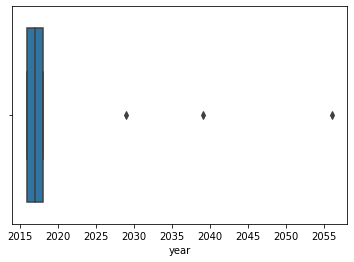

In [ ]:
# Checking for Outliers
#For the year column
sns.boxplot(x=fin_df['year'])
#The 3 points shown outside the boxplot, are the outliers

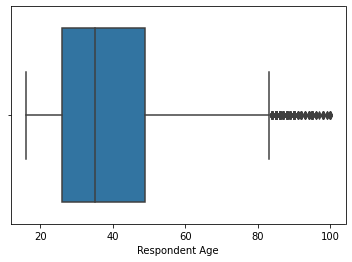

In [ ]:
#Checking for outliers in the column age
sns.boxplot(x=fin_df['Respondent Age'])
#Between ages 80 to 100, there are quite a number of outliers

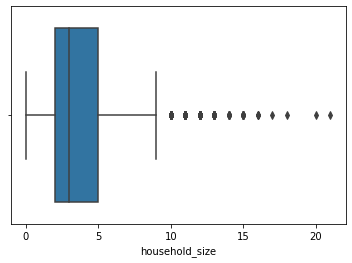

In [ ]:
#Checking for outliers in the household size column
sns.boxplot(x=fin_df['household_size'])
#There are a few families with a household size of between 10 and 21

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


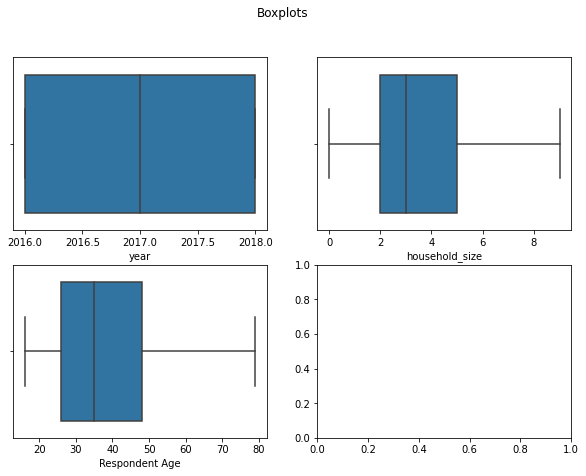

In [ ]:
#Removing outliers and plotting the Box plots without outliers
fig, ((ax1, ax2), (ax3, ax4 )) = plt.subplots(2,2, figsize=(10, 7))

sns.boxplot(fin_df[fin_df['year'] < 2020]['year'], ax=ax1)
sns.boxplot(fin_df[fin_df['household_size'] < 10]['household_size'], ax=ax2)
sns.boxplot(fin_df[fin_df['Respondent Age'] < 80]['Respondent Age'], ax=ax3)

fig.suptitle('Boxplots')
plt.show()

In [ ]:
# Identifying the Missing Data
#
fin_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#dropping the null values and confirming that all are dropped
fin_df2 = fin_df.dropna()
print(fin_df2.isnull().sum())

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64


In [ ]:
# check for duplicated data
fin_df2.duplicated().sum()

#There are no duplicates in our data.

0

In [ ]:
#fixing the messy columns
fin_df2.columns = fin_df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
# Rename a column
fin_df2.rename(columns={'the_relathip_with_head':'relationship_with_head','level_of_educuation':'level_of_education'}, inplace=True)
# drop irrelevant column
fin_df2.drop(columns='uniqueid',inplace=True)

fin_df2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#convert column year from int64 to datetime

fin_df2['year']= pd.to_datetime(fin_df2['year']) 
fin_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 23343 non-null  object        
 1   year                    23343 non-null  datetime64[ns]
 2   has_a_bank_account      23343 non-null  object        
 3   type_of_location        23343 non-null  object        
 4   cell_phone_access       23343 non-null  object        
 5   household_size          23343 non-null  float64       
 6   respondent_age          23343 non-null  float64       
 7   gender_of_respondent    23343 non-null  object        
 8   relationship_with_head  23343 non-null  object        
 9   marital_status          23343 non-null  object        
 10  level_of_education      23343 non-null  object        
 11  type_of_job             23343 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(9)
me

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 6. Exploratory Analysis

*  We'll check the: Mean, Median, Standard Deviation, Kurtosis/skewness & distribution/range.
* We will also build plots to visualize our data each at a time


In [ ]:
#Calculate measures of central tendency mean, mode and median

print('The mean is:', fin_df2.mean())
print('the mode of the data:', fin_df2.mode())
print('the median is:', fin_df2.median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


The mean is: household_size     3.688643
respondent_age    38.805509
dtype: float64
the mode of the data:   country                          year  ... level_of_education    type_of_job
0  Rwanda 1970-01-01 00:00:00.000002016  ...  Primary education  Self employed

[1 rows x 12 columns]
the median is: household_size     3.0
respondent_age    35.0
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """


In [ ]:
#Finding the min, max and range for age
min_age = fin_df2['respondent_age'].min()
print(min_age)
max_age = fin_df2['respondent_age'].max()
print(max_age)
range_age = max_age - min_age
print(range_age)


16.0
100.0
84.0


In [ ]:
#Finding the min, max and range for household size
min_size = fin_df2['household_size'].min()
print(min_size)
max_size = fin_df2['household_size'].max()
print(max_size)
range_size = max_size - min_size
print(range_size)

0.0
21.0
21.0


In [ ]:
#Calculating quantiles 
quantile_age = fin_df2["respondent_age"].quantile([0.25,0.5,0.75])
print(quantile_age)
quantile_size = fin_df2["household_size"].quantile([0.25,0.5,0.75])
print(quantile_size)

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


In [ ]:
#Calculating measures of dispersion
std = fin_df2.std()
print('the standard deviation is:', std)
skew = fin_df2.skew()
print('the skewness of the data is:', skew)
kurt = fin_df2.kurtosis()
print('The kurtosis of the data is:', kurt)

the standard deviation is: household_size     2.281184
respondent_age    16.519803
dtype: float64
the skewness of the data is: household_size    0.974109
respondent_age    0.840662
dtype: float64
The kurtosis of the data is: household_size    1.153869
respondent_age    0.098447
dtype: float64


# Univariate Analysis

In [ ]:
#Creating a frequency table for Country
fin_df2.country.value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

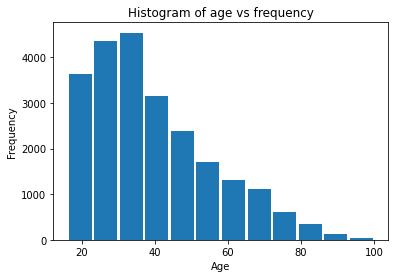

In [ ]:
#Plotting a age histogram
age_points = fin_df2['respondent_age']

plt.hist(age_points, bins=12, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()
#We can conclude that the greater population in the dataset is between the ages of 25 and 30.

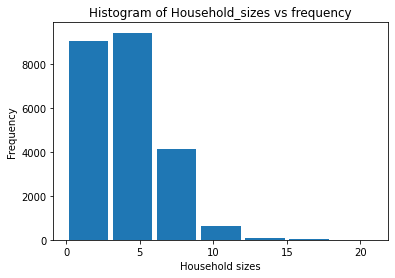

In [ ]:
#Plotting a histogram for the household size
size_points = fin_df2['household_size']

plt.hist(size_points, bins=7, histtype='bar', rwidth=0.9)
plt.xlabel('Household sizes')
plt.ylabel('Frequency')
plt.title('Histogram of Household_sizes vs frequency')
plt.show()
#We can conclude that the greater population in the dataset has a household size of between 2 to 3

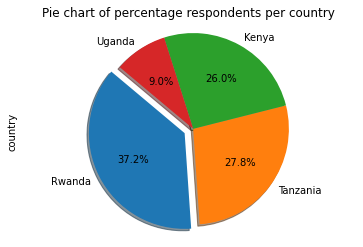

In [ ]:
#pie chart for countries
explode = (0.1, 0, 0, 0) 
fin_df2.country.value_counts().plot(kind='pie',autopct='%1.1f%%', explode=explode, shadow = True, startangle = 140 )

plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()
#We can conclude that Rwanda has the highest number of respondents in this study at 37.2% and Uganda the lowest at 9.0%

#Bivariate Analysis

In [ ]:
#Calculating correlation
correlation_df = fin_df2.corr()
correlation_df

,household_size,respondent_age
household_size,1.000000,-0.119709
respondent_age,-0.119709,1.000000


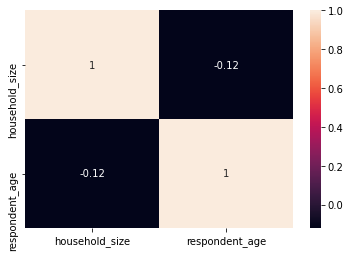

In [ ]:
#plotting a correlation heatmap
sns.heatmap(correlation_df, xticklabels=correlation_df.columns, yticklabels=correlation_df.columns, annot=True)
#There is basically no correlation between household size and age of respondents

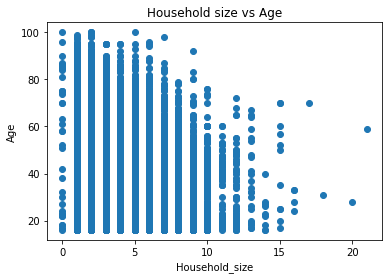

In [ ]:
#Plotting scatter plots
plt.scatter(fin_df2["household_size"] , fin_df2["respondent_age"])

# Giving our scatterplot a title
plt.title('Household size vs Age')

# Labelling our x axis
plt.xlabel('Household_size')

# Labelling our y axis
plt.ylabel('Age')

# We then display our scatterplot as shown below
plt.show()

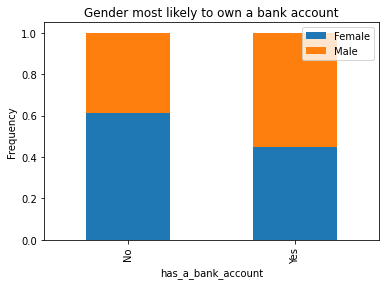

In [ ]:
#Gender most likely to own a bank account
g1 = fin_df2.groupby('has_a_bank_account')['gender_of_respondent'].value_counts(normalize=True).unstack()
g1.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Gender most likely to own a bank account")

# Displaying our chart
plt.show()

#We see that the difference between the males and females who own a bank account is significant. 
#The number of Males who own a bank account is significantly more than females.

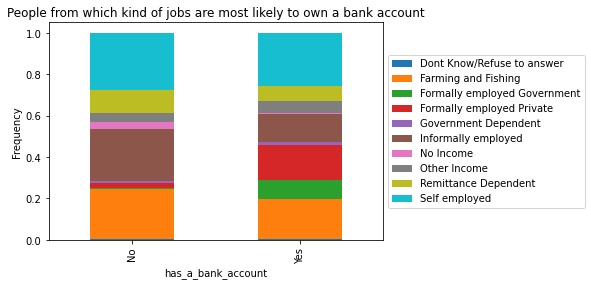

In [ ]:
#People from which kind of jobs are most likely to own a bank account
g2 = fin_df2.groupby('has_a_bank_account')['type_of_job'].value_counts(normalize=True).unstack()
g2.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# Adding a title
plt.title("People from which kind of jobs are most likely to own a bank account")

# Displaying our chart
plt.show()
 
#Individuals who are self employed are most likely to have a bank account and those with no income are less likely to have a bank account

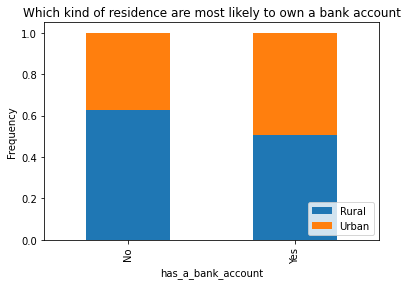

In [ ]:
#People from which kind of residence are most likely to own a bank account
g3 = fin_df2.groupby('has_a_bank_account')['type_of_location'].value_counts(normalize=True).unstack()
g3.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc="lower right")

# Adding a title
plt.title("Which kind of residence are most likely to own a bank account")

# Displaying our chart
plt.show()
 

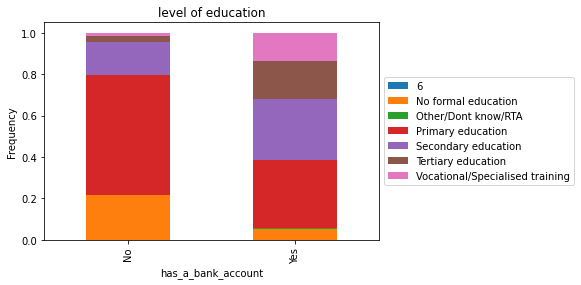

In [ ]:
#Compare the level of education to owning a bank account
g4 = fin_df2.groupby('has_a_bank_account')['level_of_education'].value_counts(normalize=True).unstack()
g4.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# Adding a title
plt.title("level of education")

# Displaying our chart
plt.show()
 

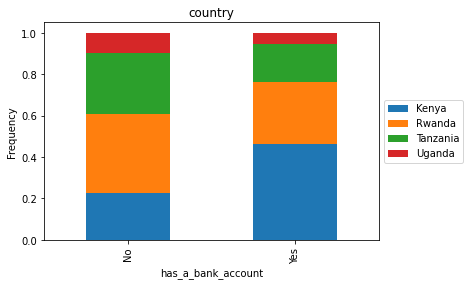

In [ ]:
#Which country are people most likely to own a bank account
g5 = fin_df2.groupby('has_a_bank_account')['country'].value_counts(normalize=True).unstack()
g5.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# Adding a title
plt.title("country")

# Displaying our chart
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


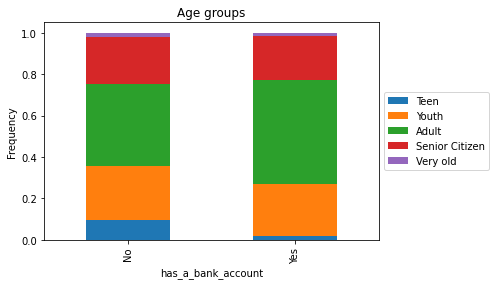

In [ ]:
#Numerical-Categorical Variables
#create Age groups

bins= [10,20,30,50,80,100]
labels = ['Teen','Youth','Adult','Senior Citizen','Very old']
fin_df2['AgeGroup'] = pd.cut(fin_df2['respondent_age'], bins=bins, labels=labels, right=False)
fin_df2
#People from which AgeGroup are most likely to own a bank account
ax6 = fin_df2.groupby('has_a_bank_account')['AgeGroup'].value_counts(normalize=True).unstack()
ax6.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# Adding a title
plt.title("Age groups")

# Displaying our chart
plt.show()




#Multivariate Analysis

**Checking for relationships between dependent and independent variable**

In [ ]:
#Converting datatypes
#convert column year from int64 to datetime
#and residence to category
fin_df2['country'] = fin_df2['country'].astype('category')
fin_df2['has_a_bank_account'] = fin_df2['has_a_bank_account'].astype('category')
fin_df2['type_of_location'] = fin_df2['type_of_location'].astype('category')
fin_df2['gender_of_respondent'] = fin_df2['gender_of_respondent'].astype('category')
fin_df2['level_of_education'] = fin_df2['level_of_education'].astype('category')
fin_df2['type_of_job'] = fin_df2['type_of_job'].astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
fin_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 23343 non-null  category      
 1   year                    23343 non-null  datetime64[ns]
 2   has_a_bank_account      23343 non-null  category      
 3   type_of_location        23343 non-null  category      
 4   cell_phone_access       23343 non-null  object        
 5   household_size          23343 non-null  float64       
 6   respondent_age          23343 non-null  float64       
 7   gender_of_respondent    23343 non-null  category      
 8   relationship_with_head  23343 non-null  object        
 9   marital_status          23343 non-null  object        
 10  level_of_education      23343 non-null  category      
 11  type_of_job             23343 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(2),

In [ ]:
#Checking for relationship between dependent variable and independent variable
df= fin_df2.copy()
df.head(3)
to_nums = {"has_a_bank_account": {"Yes": 1, "No": 0},
           "type_of_location": {"Rural": 0, "Urban": 1},
           "gender_of_respondent": {"Female": 2, "Male": 3}}
import scipy.stats as stats

#To convert the columns to numbers using replace :
df.replace(to_nums, inplace=True)

#calculate point-biserial correlation
x = df['has_a_bank_account']
y = df['respondent_age']
stats.pointbiserialr(x, y)
#There is close to no linear correlation between age and having a bank account

PointbiserialrResult(correlation=0.019644672271212547, pvalue=0.0026863215419807578)

In [ ]:
x = df['has_a_bank_account']
y = df['household_size']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

PointbiserialrResult(correlation=-0.02304984733974234, pvalue=0.0004284158251999357)

In [ ]:
x = df['has_a_bank_account']
y = df['gender_of_respondent']
stats.pointbiserialr(x, y)
#There is a weak correlation between gender and having a bank account

PointbiserialrResult(correlation=0.11615307466742536, pvalue=6.383536170940101e-71)

**Reduction Techniques**

In [ ]:
fin_df2.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,1970-01-01 00:00:00.000002018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,1970-01-01 00:00:00.000002018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,1970-01-01 00:00:00.000002018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,1970-01-01 00:00:00.000002018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,1970-01-01 00:00:00.000002018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#LDA using the dataset fin_df2
#dividing data into labels and feature set

x = fin_df2.iloc[:, 5:6].values
y = fin_df2.iloc[:, 2].values
x
y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [ ]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Feature scaling
#performing feature scaling:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#performing LDA with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print(x_test)
print(x_train)

[[ 1.88414498]
 [ 1.00837434]
 [-1.18105226]
 ...
 [ 1.00837434]
 [-0.74316694]
 [ 0.57048902]]
[[ 0.1326037 ]
 [ 0.57048902]
 [ 0.57048902]
 ...
 [-0.30528162]
 [ 0.57048902]
 [-0.74316694]]


In [ ]:
#Training and Making Predictions
#using the random forest classifier to evaluate the performance of a LDA-reduced algorithms
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# Evaluating the Performance
# with the help of a confusion matrix and find the accuracy of the prediction.


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 80%, 


[[4008    0]
 [ 661    0]]
Accuracy0.8584279288926965


## 6. Challenging the solution

**Summary**

1.   The difference between the males and females who own a bank account is 
significant. The number of Males who own a bank account is significantly more than females.
2.   Individuals who are self employed are most likely to have a bank account and those who are informally employed are less likely to have a bank account
3. Individuals from urban setup are most likely to have a bank account and
those from rural areas are less likely to have a bank account
4.  Individuals with a secondary education are most likely to have a bank account and those with a primary level education are less likely to have a bank account
5. Individuals from Kenya are most likely to have a bank account and those Uganda are less likely to have a bank account
6. Individuals between the ages of 30-50, adults are most likely to have a bank account and those above 80years are less likely to have a bank account
7.  Reduction Technique was **Linear Discriminant Analysis** and the model achieved an accuracy of **85.84%**.





## 7. Follow up questions

We need to look at the economic factors and the government policies influencing the peoples' decision to opening a bank account.

### a). Did we have the right data?


*   Yes




### b). Do we need other data to answer our question?

*   The data was able to answer our research question





### c). Did we have the right question?


*   Yes


